# 21-vehicle-eda
> Exploratory data analysis on the vehicle variables

In [ ]:
# import packages
import pandas as pd
import janitor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# code to read data files and clean names
# copied from other notebook
individual_sample = pd.read_csv('sample_data/individual_sample.csv', sep = ',', skiprows=[1]).clean_names()
product = pd.read_csv('sample_data/product.csv', sep = '|', skiprows=[1]).clean_names()
sales_sample = pd.read_csv('sample_data/sales_data_sample.csv', sep = ',', skiprows=[1]).clean_names()
store = pd.read_csv('sample_data/store.csv', sep = '|', skiprows=[1]).clean_names()
vehicle_sample = pd.read_csv('sample_data/vehicle_sample.csv', sep = ',', skiprows=[1]).clean_names()

In [ ]:
# code to combine the various csv files into one dataframe
# copied from other notebook
individual_sample = individual_sample.rename(columns = {'mzb_indiv_id':'indiv_id'})
mega_table = sales_sample.merge(product, on = 'article_id', how = 'left')
mega_table = mega_table.merge(store, on = 'store_id', how = 'left')
mega_table = mega_table.merge(individual_sample, on = 'indiv_id', how = 'left')
mega_table = mega_table.merge(vehicle_sample, on = 'vehicle_id', how = 'left')

The following code is investigating nulls in the dataset. The team discovered that vehicle_sample is only part of the vehicle ids that are in the full dataset in ACCRE. Therefore, the nulls are not representative of how the dataset will look when we join in ACCRE, but this is something to keep in mind as we work in ACCRE.

In [ ]:
# for only a very, very small percentage <1% is the vehicle model not null
# only 15K rows out of the megatable that is 4 million
mega_table[mega_table.make.notnull()]

,unnamed_0_x,store_id,tran_id,date,article_id,indiv_id,vehicle_id,units,sales,prod_group_code,...,msa_,unnamed_0_y,email_optin_ind,ah1_res_bus_indc,supp1_bus_pander,unnamed_0,make,model,sub_model,model_year
11706,11707,22055,992297610,2018-07-20,7009759,265468928.0,969825968,1.0,7.00,4.0,...,"PHILADELPH,",2773019,Y,R,N,27055276.0,TOYOTA,COROLLA IM BASE,Base,2018.0
11707,11708,22055,992297610,2018-07-20,7046930,265468928.0,969825968,0.0,0.00,4.0,...,"PHILADELPH,",2773019,Y,R,N,27055276.0,TOYOTA,COROLLA IM BASE,Base,2018.0
11708,11709,22055,992297610,2018-07-20,7001671,265468928.0,969825968,0.0,0.00,4.0,...,"PHILADELPH,",2773019,Y,R,N,27055276.0,TOYOTA,COROLLA IM BASE,Base,2018.0
11709,11710,22055,992297610,2018-07-20,7001671,265468928.0,969825968,0.0,0.00,4.0,...,"PHILADELPH,",2773019,Y,R,N,27055276.0,TOYOTA,COROLLA IM BASE,Base,2018.0
11710,11711,22055,992297610,2018-07-20,7001671,265468928.0,969825968,0.0,0.00,4.0,...,"PHILADELPH,",2773019,Y,R,N,27055276.0,TOYOTA,COROLLA IM BASE,Base,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999374,3999375,784285,990049860,2017-11-12,7034653,312008751.0,958640114,1.0,26.00,4.0,...,"PHOENIX,AZ",10404517,Y,R,N,24039260.0,HYUNDAI,SONATA SPORT,Sport,2017.0
3999375,3999376,784285,990049860,2017-11-12,7034654,312008751.0,958640114,1.0,0.52,4.0,...,"PHOENIX,AZ",10404517,Y,R,N,24039260.0,HYUNDAI,SONATA SPORT,Sport,2017.0
3999376,3999377,784285,990049860,2017-11-12,7029718,312008751.0,958640114,0.0,5.00,4.0,...,"PHOENIX,AZ",10404517,Y,R,N,24039260.0,HYUNDAI,SONATA SPORT,Sport,2017.0
3999377,3999378,784285,990049860,2017-11-12,7001674,312008751.0,958640114,0.0,-12.76,4.0,...,"PHOENIX,AZ",10404517,Y,R,N,24039260.0,HYUNDAI,SONATA SPORT,Sport,2017.0


In [ ]:
# almost all of the vehicle information is null
# almost all 4 million entries
mega_table.loc[mega_table['make'].isnull()]

,unnamed_0_x,store_id,tran_id,date,article_id,indiv_id,vehicle_id,units,sales,prod_group_code,...,msa_,unnamed_0_y,email_optin_ind,ah1_res_bus_indc,supp1_bus_pander,unnamed_0,make,model,sub_model,model_year
0,1,337934,990994590,2018-07-23,7001647,318422234.0,944814728,0.0,-8.55,4.0,...,"HAGERSTOWN,",11239886,Y,R,N,NaN,NaN,NaN,NaN,NaN
1,2,337934,990994590,2018-07-23,7001715,318422234.0,944814728,0.0,-50.45,4.0,...,"HAGERSTOWN,",11239886,Y,R,N,NaN,NaN,NaN,NaN,NaN
2,3,337934,990994590,2018-07-23,7096547,318422234.0,944814728,0.0,10.00,4.0,...,"HAGERSTOWN,",11239886,Y,R,N,NaN,NaN,NaN,NaN,NaN
3,4,337934,990994590,2018-07-23,7001647,318422234.0,944814728,0.0,0.00,4.0,...,"HAGERSTOWN,",11239886,Y,R,N,NaN,NaN,NaN,NaN,NaN
4,5,337934,990994590,2018-07-23,7001715,318422234.0,944814728,0.0,0.00,4.0,...,"HAGERSTOWN,",11239886,Y,R,N,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000499,4000500,328307,991045250,2017-11-30,7006062,287704505.0,961712384,0.0,0.00,4.0,...,"ST.LOUIS,M",7175807,Y,R,N,NaN,NaN,NaN,NaN,NaN
4000500,4000501,328307,991045250,2017-11-30,7001665,287704505.0,961712384,0.0,0.00,4.0,...,"ST.LOUIS,M",7175807,Y,R,N,NaN,NaN,NaN,NaN,NaN
4000501,4000502,328307,991045250,2017-11-30,7006472,287704505.0,961712384,0.0,0.00,4.0,...,"ST.LOUIS,M",7175807,Y,R,N,NaN,NaN,NaN,NaN,NaN
4000502,4000503,328307,991045250,2017-11-30,7005229,287704505.0,961712384,0.0,199.99,4.0,...,"ST.LOUIS,M",7175807,Y,R,N,NaN,NaN,NaN,NaN,NaN


In [ ]:
# confirming that join is working and that the vehicle ids that are blank in mega_table are not in vehicle_sample
# the below ids are in mega_table but not in vehicle_sample so vehicle columns are coming up null
# seems like most of the vehicle ids in the mega_table are not in vehicle_sample
vehicle_sample.loc[vehicle_sample['vehicle_id'] == 944814728]
vehicle_sample.loc[vehicle_sample['vehicle_id'] == 961712384]

,unnamed_0,vehicle_id,make,model,sub_model,model_year


In [ ]:
# saving the null and not null mega_table rows as different dataframes to investigate more
vehicle_null = mega_table.loc[mega_table['make'].isnull()]
vehicle_not_null = mega_table[mega_table.make.notnull()]

In [ ]:
# confirm that all vehicle that have vehicle information are eligible individuals
# confirmed - same number of rows as vehicle_not_null
vehicle_not_null[(vehicle_not_null['ah1_res_bus_indc'] == 'R') & (vehicle_not_null['supp1_bus_pander'] == 'N') & (vehicle_not_null['email_optin_ind'] == 'Y')]

,unnamed_0_x,store_id,tran_id,date,article_id,indiv_id,vehicle_id,units,sales,prod_group_code,...,msa_,unnamed_0_y,email_optin_ind,ah1_res_bus_indc,supp1_bus_pander,unnamed_0,make,model,sub_model,model_year
11706,11707,22055,992297610,2018-07-20,7009759,265468928.0,969825968,1.0,7.00,4.0,...,"PHILADELPH,",2773019,Y,R,N,27055276.0,TOYOTA,COROLLA IM BASE,Base,2018.0
11707,11708,22055,992297610,2018-07-20,7046930,265468928.0,969825968,0.0,0.00,4.0,...,"PHILADELPH,",2773019,Y,R,N,27055276.0,TOYOTA,COROLLA IM BASE,Base,2018.0
11708,11709,22055,992297610,2018-07-20,7001671,265468928.0,969825968,0.0,0.00,4.0,...,"PHILADELPH,",2773019,Y,R,N,27055276.0,TOYOTA,COROLLA IM BASE,Base,2018.0
11709,11710,22055,992297610,2018-07-20,7001671,265468928.0,969825968,0.0,0.00,4.0,...,"PHILADELPH,",2773019,Y,R,N,27055276.0,TOYOTA,COROLLA IM BASE,Base,2018.0
11710,11711,22055,992297610,2018-07-20,7001671,265468928.0,969825968,0.0,0.00,4.0,...,"PHILADELPH,",2773019,Y,R,N,27055276.0,TOYOTA,COROLLA IM BASE,Base,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999374,3999375,784285,990049860,2017-11-12,7034653,312008751.0,958640114,1.0,26.00,4.0,...,"PHOENIX,AZ",10404517,Y,R,N,24039260.0,HYUNDAI,SONATA SPORT,Sport,2017.0
3999375,3999376,784285,990049860,2017-11-12,7034654,312008751.0,958640114,1.0,0.52,4.0,...,"PHOENIX,AZ",10404517,Y,R,N,24039260.0,HYUNDAI,SONATA SPORT,Sport,2017.0
3999376,3999377,784285,990049860,2017-11-12,7029718,312008751.0,958640114,0.0,5.00,4.0,...,"PHOENIX,AZ",10404517,Y,R,N,24039260.0,HYUNDAI,SONATA SPORT,Sport,2017.0
3999377,3999378,784285,990049860,2017-11-12,7001674,312008751.0,958640114,0.0,-12.76,4.0,...,"PHOENIX,AZ",10404517,Y,R,N,24039260.0,HYUNDAI,SONATA SPORT,Sport,2017.0


In [ ]:
# only 933 of the transactions with vehicle numbers are tire purchases
vehicle_not_null[(vehicle_not_null['prod_group_code'] == 5.0)]

,unnamed_0_x,store_id,tran_id,date,article_id,indiv_id,vehicle_id,units,sales,prod_group_code,...,msa_,unnamed_0_y,email_optin_ind,ah1_res_bus_indc,supp1_bus_pander,unnamed_0,make,model,sub_model,model_year
20083,20084,14346,992305920,2018-07-21,14859,285341839.0,889606831,2.0,211.98,5.0,...,"MELBOURNE,",6707536,Y,R,N,16282251.0,CHRYSLER,TOWN & COUNTRY TOURING,Touring,2007.0
52474,52475,141593,991253080,2018-07-30,7040215,252178816.0,940456791,0.0,28.00,5.0,...,",",112325,Y,R,N,21458449.0,BUICK,LESABRE LIMITED,Limited,2000.0
52476,52477,141593,991253080,2018-07-30,14910,252178816.0,940456791,4.0,351.96,5.0,...,",",112325,Y,R,N,21458449.0,BUICK,LESABRE LIMITED,Limited,2000.0
52478,52479,141593,991253080,2018-07-30,7097709,252178816.0,940456791,0.0,-1.45,5.0,...,",",112325,Y,R,N,21458449.0,BUICK,LESABRE LIMITED,Limited,2000.0
52481,52482,141593,991253080,2018-07-30,7097709,252178816.0,940456791,0.0,-30.80,5.0,...,",",112325,Y,R,N,21458449.0,BUICK,LESABRE LIMITED,Limited,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3976925,3976926,12335,992235480,2017-11-06,7097782,269446334.0,925704379,0.0,40.30,5.0,...,"BIRMINGHAM,",3547138,Y,R,N,18629866.0,TOYOTA,SIENNA XLE,XLE (AWD),2010.0
3976930,3976931,12335,992235480,2017-11-06,15284,269446334.0,925704379,1.0,88.54,5.0,...,"BIRMINGHAM,",3547138,Y,R,N,18629866.0,TOYOTA,SIENNA XLE,XLE (AWD),2010.0
3976933,3976934,12335,992235480,2017-11-06,15284,269446334.0,925704379,1.0,88.54,5.0,...,"BIRMINGHAM,",3547138,Y,R,N,18629866.0,TOYOTA,SIENNA XLE,XLE (AWD),2010.0
3989498,3989499,24554,991782810,2017-11-06,7097782,260937410.0,909556630,0.0,8.55,5.0,...,"BALTIMORE,",1874003,Y,R,N,13762690.0,HONDA,ACCORD LX,LX Coupe 4 Cyl.,2006.0


In [ ]:
# 255K of the transactions without vehicle numbers are tire purchases
# over 3 million are not tire purchases
vehicle_null[(vehicle_null['prod_group_code'] == 5.0)]

,unnamed_0_x,store_id,tran_id,date,article_id,indiv_id,vehicle_id,units,sales,prod_group_code,...,msa_,unnamed_0_y,email_optin_ind,ah1_res_bus_indc,supp1_bus_pander,unnamed_0,make,model,sub_model,model_year
6,7,9946,991604320,2018-07-24,1222,318411709.0,971231537,4.0,793.96,5.0,...,"NON-MET MN,",11238794,Y,R,N,NaN,NaN,NaN,NaN,NaN
25,26,9946,991604320,2018-07-24,7097782,318411709.0,971231537,0.0,125.28,5.0,...,"NON-MET MN,",11238794,Y,R,N,NaN,NaN,NaN,NaN,NaN
29,30,18929,992094320,2018-07-09,7091037,315301745.0,968621013,0.0,0.00,5.0,...,"HUNTSVILLE,",10802981,Y,R,N,NaN,NaN,NaN,NaN,NaN
31,32,18929,992094320,2018-07-09,7097782,315301745.0,968621013,0.0,66.68,5.0,...,"HUNTSVILLE,",10802981,Y,R,N,NaN,NaN,NaN,NaN,NaN
32,33,18929,992094320,2018-07-09,97606,315301745.0,968621013,4.0,459.96,5.0,...,"HUNTSVILLE,",10802981,Y,R,N,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000427,4000428,3247,991666570,2017-11-29,2379,501009408.0,964840068,1.0,86.99,5.0,...,"BILOXI,MS",14724723,Y,R,N,NaN,NaN,NaN,NaN,NaN
4000484,4000485,328307,991045250,2017-11-30,7097155,287704505.0,961712384,0.0,-60.32,5.0,...,"ST.LOUIS,M",7175807,Y,R,N,NaN,NaN,NaN,NaN,NaN
4000485,4000486,328307,991045250,2017-11-30,463,287704505.0,961712384,4.0,831.96,5.0,...,"ST.LOUIS,M",7175807,Y,R,N,NaN,NaN,NaN,NaN,NaN
4000487,4000488,328307,991045250,2017-11-30,7097782,287704505.0,961712384,0.0,120.64,5.0,...,"ST.LOUIS,M",7175807,Y,R,N,NaN,NaN,NaN,NaN,NaN


In [ ]:
# investigate how many unique vehicles are in each table
# only 524 unique vehicles that are not null in the mega table
# 137K in the null table
# need to investigate the vehicle_id that is 1 in the null values
print(vehicle_not_null['vehicle_id'].value_counts())
print(vehicle_null['vehicle_id'].value_counts())

902665104    394
923088511    225
919868543    203
916397609    200
924480617    182
            ... 
965751518      1
965687878      1
399775336      1
962716502      1
962180357      1
Name: vehicle_id, Length: 524, dtype: int64
1            43517
911829775      795
887616532      781
939702173      762
946406473      712
             ...  
959930460        1
936445636        1
311411996        1
889230324        1
901770251        1
Name: vehicle_id, Length: 137075, dtype: int64


In [ ]:
# there are over 43K values that have 1 as the vehicle id
# suggest deleting these values from the dataframe as this seems to be a filler value with no actual vehicle information
# 11K of the 43K are tire purchases which we are interested in
print(mega_table.loc[mega_table['vehicle_id'] == 1].shape)
print(mega_table.loc[(mega_table['vehicle_id'] == 1) & (mega_table['prod_group_code'] == 5)].shape)

(43517, 33)
(11032, 33)


In [ ]:
# out of the 524 unique vehicle ids in the data thathas vehicle information, there are 521 unique people
print(vehicle_not_null['indiv_id'].nunique())
print(vehicle_not_null['vehicle_id'].nunique())

521
524


In [ ]:
# This means that 
# only 3 people have more than one car out of the 521 people that do not have null vehicle information
# all 3 people have 2 cars 
indiv_by_vehicle = vehicle_not_null.groupby(['indiv_id'])['vehicle_id'].nunique().reset_index()
print(indiv_by_vehicle.loc[indiv_by_vehicle['vehicle_id'] > 1])

        indiv_id  vehicle_id
30   255446434.0           2
38   256487427.0           2
518  614600916.0           2


In [ ]:
# example of information for one of the people that has two cars
# they bought tires only once for their first car
# all other purchases are product code 4
vehicle_not_null.loc[vehicle_not_null['indiv_id'] == indiv_by_vehicle.iloc[38][0]]

,unnamed_0_x,store_id,tran_id,date,article_id,indiv_id,vehicle_id,units,sales,prod_group_code,...,msa_,unnamed_0_y,email_optin_ind,ah1_res_bus_indc,supp1_bus_pander,unnamed_0,make,model,sub_model,model_year
1672498,1672499,21431,991522430,2016-08-21,7015016,256487427.0,950637235,0.0,0.00,4.0,...,"DALLAS,TX",965257,Y,R,N,13509552.0,NISSAN,ALTIMA S,S 2.5 Sedan,2010.0
1672501,1672502,21431,991522430,2016-08-21,85961,256487427.0,950637235,2.0,160.18,5.0,...,"DALLAS,TX",965257,Y,R,N,13509552.0,NISSAN,ALTIMA S,S 2.5 Sedan,2010.0
1672533,1672534,21431,991522430,2016-08-21,7008026,256487427.0,950637235,0.0,0.00,4.0,...,"DALLAS,TX",965257,Y,R,N,13509552.0,NISSAN,ALTIMA S,S 2.5 Sedan,2010.0
1672535,1672536,21431,991522430,2016-08-21,7046930,256487427.0,950637235,0.0,0.00,4.0,...,"DALLAS,TX",965257,Y,R,N,13509552.0,NISSAN,ALTIMA S,S 2.5 Sedan,2010.0
1672537,1672538,21431,991521350,2016-08-20,7046930,256487427.0,950637235,0.0,0.00,4.0,...,"DALLAS,TX",965257,Y,R,N,13509552.0,NISSAN,ALTIMA S,S 2.5 Sedan,2010.0
1672549,1672550,21431,991522430,2016-08-21,7008195,256487427.0,950637235,0.0,0.00,4.0,...,"DALLAS,TX",965257,Y,R,N,13509552.0,NISSAN,ALTIMA S,S 2.5 Sedan,2010.0
1672550,1672551,21431,991521350,2016-08-20,7004578,256487427.0,950637235,0.0,84.99,4.0,...,"DALLAS,TX",965257,Y,R,N,13509552.0,NISSAN,ALTIMA S,S 2.5 Sedan,2010.0
1672577,1672578,21431,991521350,2016-08-20,7004584,256487427.0,950637235,0.0,-25.00,4.0,...,"DALLAS,TX",965257,Y,R,N,13509552.0,NISSAN,ALTIMA S,S 2.5 Sedan,2010.0
1672580,1672581,21431,991521350,2016-08-20,7005333,256487427.0,950637235,0.0,0.00,4.0,...,"DALLAS,TX",965257,Y,R,N,13509552.0,NISSAN,ALTIMA S,S 2.5 Sedan,2010.0
2944814,2944815,21431,991761460,2018-10-05,7003381,256487427.0,981248430,0.0,-1.27,4.0,...,"DALLAS,TX",965257,Y,R,N,8546838.0,NISSAN,ALTIMA SV,SV 2.5,2014.0


In [ ]:
# confirm a different way that join is working
# list the unique vehicle ids in null and not null and save as a list
# then find the rows in vehicle_sample that have these ids
null_ids = vehicle_null['vehicle_id'].unique()
null_ids = null_ids.tolist()
not_null_ids = vehicle_not_null['vehicle_id'].unique()
not_null_ids = not_null_ids.tolist()

In [ ]:
# 524 vehicles that we saw previously in vehicle_not_null
vehicle_sample[vehicle_sample['vehicle_id'].isin(not_null_ids)]

,unnamed_0,vehicle_id,make,model,sub_model,model_year
5,24402807,927448862,MAZDA,5 TOURING,Touring,2006
121,3300816,963762976,SUBARU,OUTBACK 2.5I LIMITED,2.5i Limited,2016
1101,8546838,981248430,NISSAN,ALTIMA SV,SV 2.5,2014
1302,6597458,941459514,DODGE,CHALLENGER SXT,SXT,2013
1777,25751721,954625900,FORD,FUSION SPORT,Sport,2012
...,...,...,...,...,...,...
99174,17273505,902735775,FORD,MUSTANG BASE,Deluxe,2008
99438,14988620,961431641,CHEVROLET,MALIBU LT,LT,2009
99453,8752252,931945430,FORD,EXPEDITION LIMITED,Limited,2005
99819,24444706,919807536,CADILLAC,ESCALADE ESV BASE,Base,2008


In [ ]:
# no vehicle ids are in vehicle sample that are in the mega table as null
vehicle_sample[vehicle_sample['vehicle_id'].isin(null_ids)]

,unnamed_0,vehicle_id,make,model,sub_model,model_year


Completed analysis on null values. Further analysis is on the not null vehicle table.

In [ ]:
# want to explore average model years of car makes
# create a array that has all of the unique makes that have values in the mega_table
vehicle_makes = vehicle_not_null['make'].unique()
vehicle_makes

array(['TOYOTA', 'LAND ROVER', 'HONDA', 'NISSAN', 'LEXUS', 'CHRYSLER',
       'FORD', 'ISUZU', 'CHEVROLET', 'BUICK', 'JEEP', 'KIA', 'LINCOLN',
       'GMC', 'SUBARU', 'MITSUBISHI', 'DODGE', 'ACURA', 'CADILLAC',
       'INFINITI', 'OLDSMOBILE', 'HYUNDAI', 'MAZDA', 'VOLVO', 'BMW',
       'MERCEDES-BENZ', 'MERCURY', 'PONTIAC', 'AUDI', 'VOLKSWAGEN',
       'SATURN', 'Dodge', 'Oldsmobile', 'RAM', 'SCION', 'SUZUKI'],
      dtype=object)

In [ ]:
# create an empty dataframe
# fill the dataframe with the average year for each make
make_average_year = pd.DataFrame(columns = ['make', 'avg_model_year'])
for i in range(len(vehicle_makes)-1):
    make_average_year = make_average_year.append({'make': vehicle_makes[i], 'avg_model_year':(vehicle_not_null.loc[vehicle_not_null['make'] == vehicle_makes[i]])['model_year'].mean()}, ignore_index = True)

In [ ]:
# can look at the oldest car makes that might need more tire changes, per Patrick
make_average_year.sort_values(by = 'avg_model_year')

,make,avg_model_year
32,Oldsmobile,1967.000000
20,OLDSMOBILE,1988.913043
31,Dodge,2000.000000
26,MERCURY,2000.011111
7,ISUZU,2001.000000
29,VOLKSWAGEN,2003.310811
4,LEXUS,2004.959427
1,LAND ROVER,2005.053659
9,BUICK,2005.687805
17,ACURA,2005.823834


In [ ]:
# do the same for average sales to see which makes are costing the most money
# create an empty dataframe
# fill the dataframe with the average sales for each make
make_average_sales = pd.DataFrame(columns = ['make', 'avg_sales'])
for i in range(len(vehicle_makes)-1):
    make_average_sales = make_average_sales.append({'make': vehicle_makes[i], 'avg_sales':(vehicle_not_null.loc[vehicle_not_null['make'] == vehicle_makes[i]])['sales'].mean()}, ignore_index = True)

In [ ]:
# no clear pattern for older cars costing more
make_average_sales.sort_values(by = 'avg_sales')

,make,avg_sales
32,Oldsmobile,11.068571
18,CADILLAC,12.208559
22,MAZDA,12.948514
25,MERCEDES-BENZ,12.971053
27,PONTIAC,13.082328
11,KIA,13.332634
3,NISSAN,13.446645
20,OLDSMOBILE,14.126087
16,DODGE,14.262581
2,HONDA,14.900637


In [ ]:
# code that will be useful when we are using accre to see which people have more than 1 car
indiv_by_vehicle = vehicle_not_null.groupby(['indiv_id'])['vehicle_id'].nunique().reset_index()
print(indiv_by_vehicle.loc[indiv_by_vehicle['vehicle_id'] > 1])

In [ ]:
# some eda on model year location
vehicles_not_null_tires_only = vehicle_not_null[(vehicle_not_null['prod_group_code'] == 5.0)]
vehicles_not_null_tires_only = vehicles_not_null_tires_only.drop_duplicates(subset=['vehicle_id'])
model_year_counts = pd.DataFrame(vehicles_not_null_tires_only['model_year'].value_counts())
model_year_counts = model_year_counts.reset_index()
model_year_counts.columns = ['years', 'counts']
model_year_counts = model_year_counts[:20]
x_values = model_year_counts.iloc[:,0]
y_values = model_year_counts.iloc[:,1]

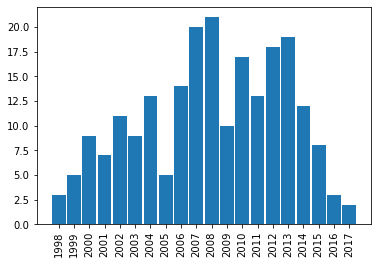

In [ ]:
# plotting counts by model year
plt.bar(x_values, height = y_values, width = 0.9)
plt.xticks(rotation = 90)
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0))
plt.show()

In [ ]:
# some eda on make of cars
make_counts = pd.DataFrame(vehicles_not_null_tires_only['make'].value_counts())
make_counts = make_counts.reset_index()
make_counts.columns = ['makes', 'counts']
make_counts = make_counts[:20]
x_values = make_counts.iloc[:,0]
y_values = make_counts.iloc[:,1]

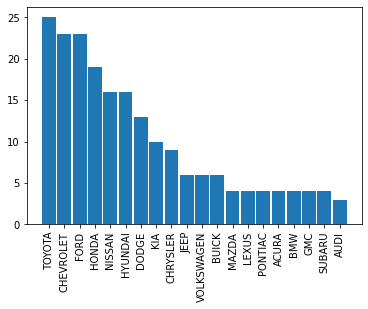

In [ ]:
# plotting counts by make of vehicles
plt.bar(x_values, height = y_values, width = 0.9)
plt.xticks(rotation = 90)
plt.show()

Some EDA on other variables outside of vehicles

In [ ]:
# some eda on msa location
mega_table_tires_only = mega_table[(mega_table['prod_group_code'] == 5.0)]
msa_counts = pd.DataFrame(mega_table_tires_only['msa_'].value_counts())
msa_counts = msa_counts.reset_index()
msa_counts.columns = ['locations', 'counts']
msa_counts = msa_counts[:20]
x_values = msa_counts.iloc[:,0]
y_values = msa_counts.iloc[:,1]

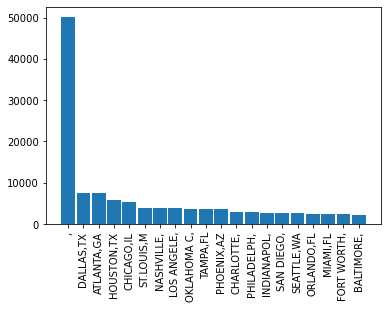

In [ ]:
# plotting counts by location
# need to eliminate the comma variable
plt.bar(x_values, height = y_values, width = 0.9)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# found that alot (666K) of the msa location identifiers are ' which seems to be a placeholder like the 1 for vehicle_id
mega_table.loc[mega_table['msa_'] == ',']

,unnamed_0_x,store_id,tran_id,date,article_id,indiv_id,vehicle_id,units,sales,prod_group_code,...,msa_,unnamed_0_y,email_optin_ind,ah1_res_bus_indc,supp1_bus_pander,unnamed_0,make,model,sub_model,model_year
176,177,120383,991719700,2018-07-03,7046930,320867082.0,946058946,0.0,0.00,4.0,...,",",11531493,Y,R,N,NaN,NaN,NaN,NaN,NaN
177,178,120383,991719700,2018-07-03,7008190,320867082.0,946058946,0.0,6.00,4.0,...,",",11531493,Y,R,N,NaN,NaN,NaN,NaN,NaN
178,179,120383,991719700,2018-07-03,7087076,320867082.0,946058946,0.0,280.00,4.0,...,",",11531493,Y,R,N,NaN,NaN,NaN,NaN,NaN
179,180,120383,991719700,2018-07-03,7013066,320867082.0,946058946,0.0,-13.92,5.0,...,",",11531493,Y,R,N,NaN,NaN,NaN,NaN,NaN
180,181,120383,991719700,2018-07-03,7001708,320867082.0,946058946,0.0,-60.00,4.0,...,",",11531493,Y,R,N,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000317,4000318,121800,991155950,2017-11-22,7007582,546072990.0,964832272,2.0,14.00,4.0,...,",",16050829,Y,R,N,NaN,NaN,NaN,NaN,NaN
4000318,4000319,121800,991155950,2017-11-22,7040215,546072990.0,964832272,0.0,24.94,5.0,...,",",16050829,Y,R,N,NaN,NaN,NaN,NaN,NaN
4000319,4000320,121800,991155950,2017-11-22,7089565,546072990.0,964832272,0.0,0.00,5.0,...,",",16050829,Y,R,N,NaN,NaN,NaN,NaN,NaN
4000320,4000321,121800,991155950,2017-11-22,7089566,546072990.0,964832272,0.0,-46.00,5.0,...,",",16050829,Y,R,N,NaN,NaN,NaN,NaN,NaN
